In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [40]:
# Создаём сэмпл
n_samples = 500

age_owner = np.random.choice(70, n_samples) + 18
age_house = np.random.choice(120, n_samples) + 1

#размеры жилого помещения в м
length = np.random.choice(10, n_samples) + 7
width = np.random.choice(8, n_samples) + 7

#площадь не жилого помещения в м*м
other_space = np.random.choice(length * width/20, n_samples) + 7

#коэф. стоимости
k_residential = 1 - (age_owner/100)
k_other = k_residential * (age_owner/100)


price = (k_residential * (length * width) + k_other * other_space) * 1000

data = pd.DataFrame({'age_owner': age_owner, 'age_house': age_house, 'length': length, 'width': width,
                     'other_space': other_space, 'k_residential': k_residential, 'k_other': k_other, 'price': price})
data.head(5)

,age_owner,age_house,length,width,other_space,k_residential,k_other,price
0,30,94,13,14,16.75,0.70,0.2100,130917.50
1,69,79,11,13,12.40,0.31,0.2139,46982.36
2,24,64,14,13,9.80,0.76,0.1824,140107.52
3,36,119,14,14,11.40,0.64,0.2304,128066.56
4,42,70,16,10,10.20,0.58,0.2436,95284.72


In [41]:
from sklearn.metrics import mean_absolute_error

X = data[['age_owner', 'age_house', 'length', 'width', 'other_space']]
y = data['price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['age_owner', 'age_house', 'length', 'width', 'other_space']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-1.21314748e+03  2.31570573e+00  5.00669825e+03  5.38898464e+03
  2.37390672e+02]
Bias: 6038.0342362388255
Error: 6233.558655713808


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CC8F630>]],
      dtype=object)

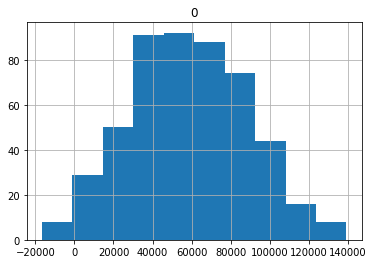

In [47]:
#посмотрим распределение
pd.DataFrame(pred_values).hist()

In [50]:
#посмотрим линейную регресию на 'age_house', 'length', 'width'
X = data[['age_house', 'length', 'width']]
y = data['price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['age_house', 'length', 'width',]])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [   8.52537523 4668.9171272  5420.06772972]
Bias: -52412.93188950982
Error: 20447.406635952295


Ошибка стала больше :)

In [59]:
# Создаем новый признак
data['mult_age'] = data['age_house'] / data['age_owner']
data.head(5)

,age_owner,age_house,length,width,other_space,k_residential,k_other,price,mult_age
0,30,94,13,14,16.75,0.70,0.2100,130917.50,3.133333
1,69,79,11,13,12.40,0.31,0.2139,46982.36,1.144928
2,24,64,14,13,9.80,0.76,0.1824,140107.52,2.666667
3,36,119,14,14,11.40,0.64,0.2304,128066.56,3.305556
4,42,70,16,10,10.20,0.58,0.2436,95284.72,1.666667


In [58]:
X = data[['mult_age']]
y = data['price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['mult_age']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-562.09648894]
Bias: 59720.929809674686
Error: 24257.43470261546


Ошибка стала ещё больше. По видимому, добавление призанков наугад не продуктивна :)